### 1.Import necessary libraries

In [70]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

from keras.layers import Dense ,Activation ,Dropout
from keras.models import Sequential
from keras.optimizers import Adam,RMSprop

from keras import backend as k


### 2.Load MNIST dataset 

In [71]:
# import dataset
from keras.datasets import mnist

# load dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()


In [72]:
# count the number of unique train lablel
unique ,count = np.unique(y_train,return_counts=True)
print("Train lables",dict(zip(unique,count)))

# count the number of unique test lablel
unique ,count = np.unique(y_test,return_counts=True)
print("\n Test lables",dict(zip(unique,count)))

Train lables {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

 Test lables {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


### 3.Analyzing Data
 1. Data visualization

In [73]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0,x_train.shape[0],size=25)
images = x_train[indexes]
lables = y_train[indexes]


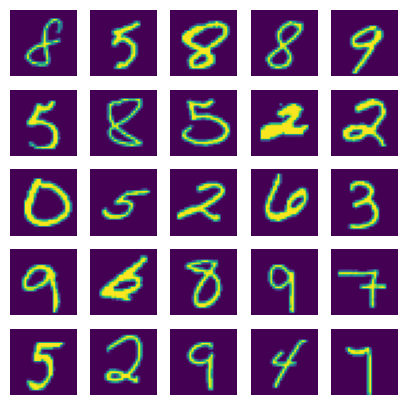

In [74]:
plt.figure(figsize=(5,5))

for i in range(len(indexes)):
    plt.subplot(5,5,i+1)
    image = images[i]
    plt.imshow(image)
    plt.axis('off')

plt.show()
plt.close('all')

### 4.Designing model architecture using Keras
#### 4.1 Import Keras layers 

In [75]:
from keras.utils import to_categorical, plot_model

##### 4.2 compute the number of labels

In [76]:
num_labels = len(np.unique(y_train))
labels = np.unique(y_train)
print(num_labels)
print(labels)

10
[0 1 2 3 4 5 6 7 8 9]


#### 4.3 One-Hot Encoding 
the labels are in digits format, 0 to 9.

This sparse scalar representation of labels is not suitable for the neural network prediction layer that outputs probabilities per class.

A more suitable format is called a one-hot vector, a 10-dim vector with all elements 0, except for the index of the digit class.

if the label is 2, the equivalent one-hot vector is [0,0,1,0,0,0,0,0,0,0]

- to_categorical function to convert categorical labels into one-hot encoded vectors

In [77]:
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

### 5.Data Preprocessing 

In [78]:
# image dimension
image_size = x_train.shape[1]
num_images = x_train.shape[0]
input_size = image_size * image_size
print(image_size)
print(input_size)
print(num_images)

28
784
60000


In [89]:
# resize 
# num_images remains the same as the original number of images.
# input_size represents the total number of elements in the flattened image
x_train = np.reshape(x_train,[-1,input_size]) # -1 indecate number of samples 
x_test = np.reshape(x_test,[-1,input_size])

Importance of Normalization:

Images can have varying brightness or intensity levels. Normalization ensures all pixel values fall within the same range, making the training process more efficient for machine learning models.
Many models use activation functions that operate better on data within a specific range (like 0 to 1). Normalization helps achieve this.

In [90]:
# Normalize x 
x_train = x_train.astype('float32')/255  # T converts the data type of x_train from its original format (probably uint8) to float32
x_test = x_test.astype('float32')/255 #  deep neural networks, work more efficiently with floating-point data.

# Normalization: This part scales the pixel values in x_train to a common range between 0 and 1. 
# It achieves this by dividing each element in the array by 255.

set hyperparameter for the nural network
1. The batch size :  is the number of samples that are passed to the network at once.
2. hidden units : This hyperparameter specifies the number of neurons in a hidden layer of the neural network.
3. dropout (0.45):
Dropout is a regularization technique used to prevent overfitting in neural networks.


In [91]:
batch_size = 128 
hidden_units = 256
dropout = 0.45

### 6.Designing the model architecture 
Both the first and second MLP layers are identical in nature with
 256 units each, followed by relu activation and dropout.

In [92]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential([
    Dense(units = hidden_units,activation= 'relu',input_dim = input_size),
    Dropout(dropout),
    Dense(units = hidden_units,activation= 'relu'),
    Dropout(dropout),
    Dense(units=num_labels,activation='softmax')
])

e:\anaconda\envs\new\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 7.View model summary 

In [93]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

The total number of parameters required can be computed as follows:

-  From input to Dense layer: 784 × 256 + 256 = 200,960.

- From first Dense to second Dense: 256 × 256 + 256 = 65,792.

- From second Dense to the output layer: 10 × 256 + 10 = 2,570.

- The total is 200,690 + 65,972 + 2,570 = 269,322.

### 8.Implement MLP model using Keras
The implementation of MLP model in Keras comprises of three steps:-

1. Compiling the model with the compile() method.

2. Training the model with fit() method.

3. Evaluating the model performance with evaluate() method.

8.1 Compile the model with compile() method

In [94]:

model.compile(loss='categorical_crossentropy',
              optimizer ='Adam',metrics=['Accuracy']) # Accuracy is the percent, or fraction, of correct predictions 

8.2 Train the model with fit() method 

In [95]:
model.fit(x_train,y_train,epochs=10 )

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - Accuracy: 0.5682 - loss: 1.2745
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - Accuracy: 0.8722 - loss: 0.4272
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - Accuracy: 0.9012 - loss: 0.3237
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - Accuracy: 0.9207 - loss: 0.2688
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - Accuracy: 0.9292 - loss: 0.2421
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - Accuracy: 0.9376 - loss: 0.2110
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - Accuracy: 0.9418 - loss: 0.1953
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - Accuracy: 0.9461 - loss: 0.1779
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - Accuracy: 0.9498 - loss: 0.1705
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - Accuracy: 0.9515 - loss: 0.1619


8.3 Evaluating model performance with evaluate() method 

In [96]:
loss ,acc = model.evaluate(x_test,y_test,batch_size= batch_size)
print("\n accuracy = ",(100*acc))

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Accuracy: 0.9440 - loss: 20.2589

 accuracy =  95.3000009059906


8.4 Accurcy On Test Data

In [97]:
y_test.shape

(10000, 10)

In [115]:
index =np.random.randint(0,y_test.shape[0])
actual = y_test[index]


predicted_proba = model.predict(np.array([x_test[index]]))# Predict probabilities
predicted_label = np.argmax(predicted_proba)                  # Get predicted class label
print(f"predicted probability : {predicted_proba}")
print(f"Predicted label: {predicted_label}")
print(f"Actual label: {actual}")
 



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
predicted probability : [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Predicted label: 5
Actual label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


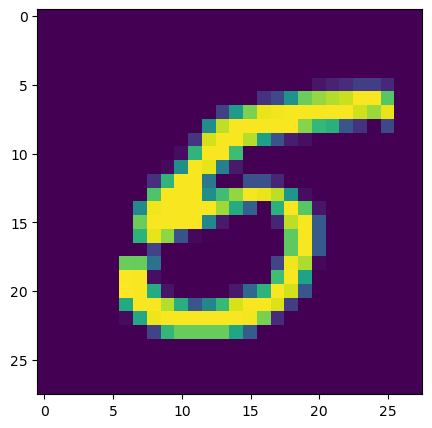

In [116]:
# visualize x_test
plt.figure(figsize=(5,5))
image = x_test[index].reshape(image_size,image_size)
plt.imshow(image)
plt.show()

Results and Conclusion : 

I build a dense neural network model to classify the MNIST digits and predict accuracy.
- We get the test accuracy of 98.3%.